In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.optimizers import RMSprop, SGD, Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [206]:
############
data = arff.loadarff('/home/dcasals/jupyter/mlproject/dataold/x_features.arff')
df = pd.DataFrame(data[0])
############
data_val = arff.loadarff('/home/dcasals/jupyter/mlproject/dataold/xval_features.arff')
df_val = pd.DataFrame(data_val[0])
############
data_test = arff.loadarff('/home/dcasals/jupyter/mlproject/dataold/xtest_features.arff')
df_test = pd.DataFrame(data_test[0])
############

In [3]:
df.describe()

,triple,bgp,join,leftjoin,union,filter,project,distinct,treesize,pcs0,...,pcs16,pcs17,pcs18,pcs19,pcs20,pcs21,pcs22,pcs23,pcs24,ex_time
count,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,...,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1260.000000
mean,9.523810e-08,-9.523810e-08,-2.857143e-07,9.523810e-08,-4.761905e-08,-3.333333e-07,-2.857143e-07,-2.857143e-07,9.523810e-08,-6.190476e-08,...,3.158730e-07,-1.611111e-07,-4.047619e-08,1.127846e-17,-5.873016e-08,1.023810e-07,-1.944444e-07,-7.142857e-09,-9.920635e-08,885.633492
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2490.144158
min,-1.288789e+00,-6.987850e-01,-3.060650e-01,-4.574470e-01,-7.879280e-01,-7.894410e-01,-2.448518e+00,-8.656820e-01,-1.497571e+00,-1.138083e+00,...,-5.842450e-01,-3.422530e-01,-4.707850e-01,-1.081591e+00,-8.824750e-01,-1.038105e+00,-7.560700e-01,-2.573500e-01,-9.406970e-01,0.200000
25%,-5.948250e-01,-6.987850e-01,-3.060650e-01,-4.574470e-01,-7.879280e-01,-7.894410e-01,4.080860e-01,-8.656820e-01,-5.587950e-01,-7.322850e-01,...,-2.498490e-01,-2.323570e-01,-2.603270e-01,-7.087300e-01,-3.148710e-01,-4.359040e-01,-2.482230e-01,-2.388870e-01,-2.592940e-01,1.000000
50%,-2.478440e-01,-2.911600e-01,-3.060650e-01,-4.574470e-01,-7.879280e-01,-7.894410e-01,4.080860e-01,-8.656820e-01,-8.940700e-02,-3.051300e-01,...,-2.052630e-01,-2.323570e-01,-2.256630e-01,-3.489530e-01,-1.296530e-01,-1.256790e-01,-1.749760e-01,-2.287620e-01,-1.661110e-01,19.800000
75%,9.913800e-02,1.164640e-01,-3.060650e-01,2.287200e-02,4.848790e-01,7.176730e-01,4.080860e-01,1.154242e+00,-8.940700e-02,3.612330e-01,...,-2.052630e-01,-1.803000e-01,-1.866660e-01,1.547360e-01,-6.174000e-03,2.288640e-01,-8.952100e-02,-2.064170e-01,-5.739700e-02,174.800000
max,2.528008e+00,2.562210e+00,3.978841e+00,3.385109e+00,1.757685e+00,2.224787e+00,4.080860e-01,1.154242e+00,3.196308e+00,3.026684e+00,...,4.431685e+00,4.465737e+00,4.453949e+00,3.176867e+00,4.315582e+00,4.217470e+00,5.465061e+00,4.469256e+00,7.009005e+00,34397.000000


In [42]:
df.columns

Index(['triple', 'bgp', 'join', 'leftjoin', 'union', 'filter', 'project',
       'distinct', 'treesize', 'pcs0', 'pcs1', 'pcs2', 'pcs3', 'pcs4', 'pcs5',
       'pcs6', 'pcs7', 'pcs8', 'pcs9', 'pcs10', 'pcs11', 'pcs12', 'pcs13',
       'pcs14', 'pcs15', 'pcs16', 'pcs17', 'pcs18', 'pcs19', 'pcs20', 'pcs21',
       'pcs22', 'pcs23', 'pcs24', 'ex_time'],
      dtype='object')

In [5]:
df_test.shape

(420, 35)

In [207]:
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Lambda, BatchNormalization
from keras.optimizers import SGD, Adagrad, Adam
from sklearn.utils import shuffle

#suffle
# df = shuffle(df)
# df.reset_index(inplace=True, drop=True) 

df_val = shuffle(df_val)
# df_val.reset_index(inplace=True, drop=True)

df_test = shuffle(df_test)
# df_test.reset_index(inplace=True, drop=True)

#Eliminando > 30000
x_train = df.loc[:, df.columns != 'ex_time']
y_train = df[['ex_time']]
#x_train = x_train[y_train[:,0]<30000,:]
#y_train = y_train[y_train[:,0]<30000,:]



x_val = df_val.loc[:, df_val.columns != 'ex_time'].values
y_val = df_val[['ex_time']].values

x_test = df_test.loc[:, df_test.columns != 'ex_time'].values
y_test = df_test[['ex_time']].values

y_val_log = np.log(y_val)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


y_train_log_min = np.min(y_train_log)
y_train_min = np.min(y_train)

y_train_log_max = np.max(y_train_log)
y_train_max = np.max(y_train)

print(y_train_log_min,y_train_min)
print(y_train_log_max,y_train_max)


ex_time   -1.609438
dtype: float64 ex_time    0.2
dtype: float64
ex_time    10.445725
dtype: float64 ex_time    34397.0
dtype: float64


In [108]:
print("Datos diferentes en el trainset: {}".format(np.unique(x_train,axis=0).shape[0]))

Datos diferentes en el trainset: 60


In [74]:
y_train[60:80]

,ex_time
60,22.0
61,20.0
62,19.6
63,19.6
64,19.6
65,19.8
66,19.8
67,36.4
68,19.6
69,19.6


<div style="background-color:rgb(174, 229, 202);">

**Como se observa solo existen 60 conbinaciones de los datos del trainset. Esto es un indicador de que los datos no son tan variados como uno preferiría.
Además para cada dato igual existen diferente resultados de tiempo de ejecución, algunos sustancialmente diferentes.**

In [181]:
xx = x_train.iloc[0:100]

In [183]:
yx = y_train.iloc[0:100]

In [190]:
xx.groupby(list(x_train.columns)).groups.values()

dict_values([Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64'), Int64Index([89], dtype='int64'), Int64Index([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 84, 85, 86, 87,
            90, 91, 92, 95, 96, 97, 98, 99],
           dtype='int64'), Int64Index([60, 61, 62, 63, 64], dtype='int64'), Int64Index([78, 79, 80, 81, 82, 83, 88, 93, 94], dtype='int64')])

In [205]:
y_train['ex_time'].iloc[[65,89]].values

array([19.8, 20. ])

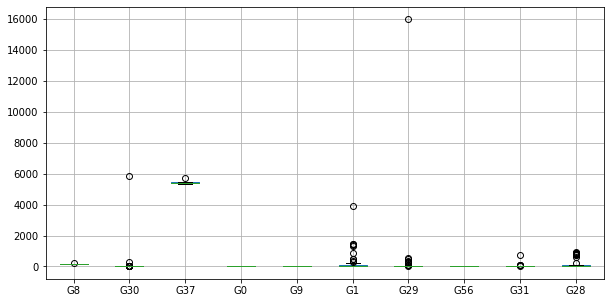

In [258]:
def showBoxPlot():
    vale = x_train.groupby(list(x_train.columns))
    lista = list(vale.groups.values())
    m = []
    s = []
    index = 0
    list_col = []
    boxplotData = pd.DataFrame()
    for grupo in lista:
        ygroup_val = y_train['ex_time'].iloc[grupo].values
        mean = np.mean(ygroup_val)
        std = np.std(ygroup_val)
        m.append(mean)
        s.append(std)
        if len(ygroup_val) > 30:
            list_col.append("G{}".format(index))
            gname = "G{}".format(index)
            colDF = pd.DataFrame({gname: ygroup_val})
            boxplotData = pd.concat([boxplotData, colDF],ignore_index=True)
        index+=1
    data_mean_std = pd.DataFrame({'MEAN':m,"STD":s})

    dataf_bplot = pd.DataFrame(boxplotData)
#     print(list(boxplotData.columns))
#     return boxplotData
    import random
    columnas = random.sample(list(boxplotData.columns), 10)
    return boxplotData[columnas].boxplot(figsize=(10,5))
showBoxPlot()

In [180]:
 y_train['ex_time'].values[800], y_train['ex_time'].values[801], y_train['ex_time'].values[[800,801]]

(19.8, 10578.8, array([   19.8, 10578.8]))

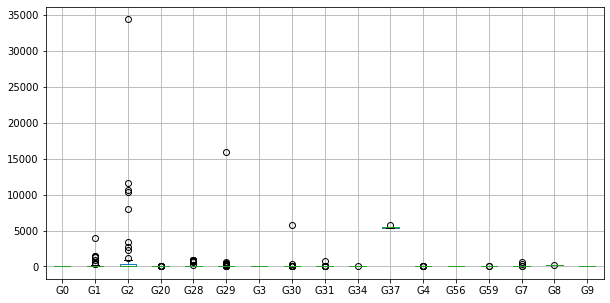

In [255]:
boxplotData = showDataInfo()

In [236]:
!pip install seaborn

     |████████████████████████████████| 215 kB 4.7 MB/s eta 0:00:01


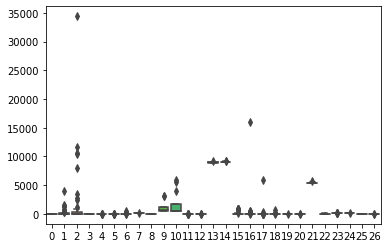

In [243]:
import seaborn as sns
sns.boxplot(data = boxplotData)
plt.figure.
plt.show()

In [8]:
#Standarización del target

scaler = StandardScaler()
y_train_log_std = scaler.fit_transform(y_train_log)
y_val_log_std = scaler.transform(y_val_log)
y_test_log_std = scaler.transform(y_test_log)

In [9]:
print(
    "Dimensiones de los datos: Cant ejemplos en train:{}, Val: {} Test: {}".
      format(x_train.shape[0],x_val.shape[0], x_test.shape[0])
     )

Dimensiones de los datos: Cant ejemplos en train:1260, Val: 420 Test: 420


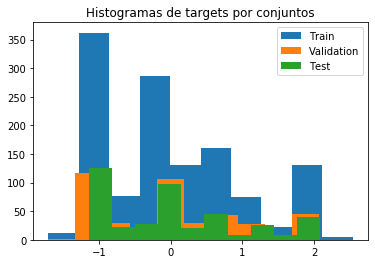

In [10]:
plt.title("Histogramas de targets por conjuntos")
plt.hist(y_train_log_std,label="Train")
plt.hist(y_val_log_std,label="Validation")
plt.hist(y_test_log_std,label="Test")
plt.legend()
plt.show()

In [11]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def rmse(y_true, y_pred):
    return K.exp(K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)))

In [17]:
def train_modelAAN(l1current, l2current, l3current):
    optimizer = SGD(lr=0.001)
    # Set callback functions to early stop training and save the best model so far
    callbacks_best = [
        EarlyStopping(monitor='val_loss', patience=20),
        ModelCheckpoint(filepath='models_legacy/bestm_legacydata_{}_{}_}{}.h5'.format(l1current, l2current, l3current), monitor='val_loss', save_best_only=True)
    ]
    model = Sequential()
    model.add(Dense(l1current, input_shape=(34,), activation='relu'))
    model.add(Dense(l2current, activation='relu'))
    model.add(Dense(l3current,activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae',coeff_determination, rmse])
    history = model.fit(x_train, y_train_log_std,
        epochs=150,
        verbose=0,
        validation_data=(x_val, y_val_log_std),
        callbacks=callbacks_best
    )
    return model,history

In [60]:
#Ajustando parámetros de neuronas necesarias por capas.
from keras.optimizers import RMSprop, SGD,Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import Input
from sklearn.metrics import r2_score
l1 = range(80,100,5)
l2 = range(60,180,20)
l3 = range(60,180,20)

best_l1 = 1
best_l2 = 1
best_l3 = 1
dftable = pd.DataFrame(columns=[])
max_r2=0
min_rmse=10000
for l1current in l1:
    for l2current in l2:
        for l3current in l3:
            model, history = train_modelAAN(l1current, l2current, l3current)
            y_pred_val = np.exp(scaler.inverse_transform(model.predict(x_val).reshape(-1, 1)))
            y_pred_train = np.exp(scaler.inverse_transform(model.predict(x_train).reshape(-1, 1)))
            y_pred_test = np.exp(scaler.inverse_transform(model.predict(x_test).reshape(-1, 1)))
            
            current_rmse = np.sqrt(mean_squared_error(y_pred_val,y_val))
            if current_rmse < min_rmse:
                best_l1 = l1current
                best_l2 = l2current
                best_l3 = l3current

                min_rmse = current_rmse
                mse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                mse_val  =  np.sqrt(mean_squared_error(y_val, y_pred_val))
                mse_test =  np.sqrt(mean_squared_error(y_test, y_pred_test))
                r2_train = np.sqrt(r2_score(y_train, y_pred_train))
                r2_val  =  np.sqrt(r2_score( y_val, y_pred_val))
                r2_test =  np.sqrt(r2_score(y_test, y_pred_test))
                
                dftable = dftable.append(pd.Series([l1current, l2current, l3current, mse_train, mse_val, mse_test,r2_train, mse_val,r2_test]), ignore_index=True)
                print("RMSE Train",l1current, l2current, l3current, np.sqrt(mean_squared_error(y_pred_train, y_train)))
                print("RMSE VAL  ",l1current, l2current, l3current, np.sqrt(mean_squared_error(y_pred_val, y_val)))
                print("RMSE TEST ",l1current, l2current, l3current, np.sqrt(mean_squared_error(y_pred_test, y_test)))
                print("____________________")

RMSE Train 80 60 60 1275.4288984085304
RMSE VAL   80 60 60 524.8258368096957
RMSE TEST  80 60 60 258.57798477303595
RMSE Train 80 60 140 1275.4460570736553
RMSE VAL   80 60 140 523.3324762902031
RMSE TEST  80 60 140 254.3375073744567
RMSE Train 80 60 160 1276.8877413075963
RMSE VAL   80 60 160 522.4622626775227
RMSE TEST  80 60 160 257.2966030020163
RMSE Train 80 80 100 1275.8418939939888
RMSE VAL   80 80 100 520.8650000845851
RMSE TEST  80 80 100 261.06454675375153
RMSE Train 80 80 140 1278.0453452356464
RMSE VAL   80 80 140 519.0193662479512
RMSE TEST  80 80 140 268.2514706548273
RMSE Train 95 160 160 1276.417277339756
RMSE VAL   95 160 160 518.6971880928868
RMSE TEST  95 160 160 252.2944424535611
Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_589 (Dense)            (None, 95)                3325      
_________________________________________________________________
den

In [ ]:
optimizer = SGD(lr=0.001)
model = Sequential()
model.add(Dense(95, input_shape=(34,), activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae',coeff_determination,rmse])
history = model.fit(x_train, y_train_log_std,
        epochs=150,
        verbose=0,
       # batch_size=20,
        validation_data=(x_val, y_val_log_std),
        callbacks=callbacks_best
           )

y_pred_val = np.exp(scaler.inverse_transform(model.predict(x_val).reshape(-1, 1)))
y_pred_train = np.exp(scaler.inverse_transform(model.predict(x_train).reshape(-1, 1)))
y_pred_test = np.exp(scaler.inverse_transform(model.predict(x_test).reshape(-1, 1)))



current_rmse = np.sqrt(mean_squared_error(y_pred_val,y_val))
if current_rmse < min_rmse:
    best_l1 = l1current
    best_l2 = l2current
    best_l3 = l3current

    min_rmse = current_rmse
    mse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    mse_val  = np.sqrt(mean_squared_error(y_pred_val, y_val))
    mse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))

    dftable = dftable.append(pd.Series([l1current,l2current,l3current, mse_train, mse_val,mse_test]),ignore_index=True)
    print("RMSE Train",l1current,l2current,l3current, np.sqrt(mean_squared_error(y_pred_train, y_train)))
    print("RMSE VAL  ",l1current,l2current,l3current, np.sqrt(mean_squared_error(y_pred_val, y_val)))
    print("RMSE TEST ",l1current,l2current,l3current, np.sqrt(mean_squared_error(y_pred_test, y_test)))
#                 dftable.add(['N1','N2','N3','RMSE Train', 'RMSE VAL', 'RMSE TEST','R2 Train', 'R2 VAL', 'R2 TEST'])
    model.save('/home/dcasals/jupyter/mlproject/dataold/modelos/model_{}_{}_{}.h5'.format(best_l1,best_l2,best_l3))
model.summary()

In [10]:
print("Best RMSE {} Best enurons in L1: {},  Best neuron in L2: {}".format(min_rmse,best_l1,best_l2))

Best RMSE 558.0388418430931 Best enurons in L1: 80,  Best neuron in L2: 80


In [67]:
dftable.columns = ['Layer1','Layer2','Layer3', 'MSE_TRAIN', 'MES_VAL','MSE_TEST']
print(dftable.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 Layer1 &  Layer2 &  Layer3 &    MSE\_TRAIN &     MES\_VAL &    MSE\_TEST \\
\midrule
   80.0 &    60.0 &    60.0 &  1275.428898 &  524.825837 &  258.577985 \\
   80.0 &    60.0 &   140.0 &  1275.446057 &  523.332476 &  254.337507 \\
   80.0 &    60.0 &   160.0 &  1276.887741 &  522.462263 &  257.296603 \\
   80.0 &    80.0 &   100.0 &  1275.841894 &  520.865000 &  261.064547 \\
   80.0 &    80.0 &   140.0 &  1278.045345 &  519.019366 &  268.251471 \\
   95.0 &   160.0 &   160.0 &  1276.417277 &  518.697188 &  252.294442 \\
\bottomrule
\end{tabular}



In [62]:
from keras.models import Model

from keras.layers import Input, Dense
from keras.optimizers import SGD

# this is the size of our encoded representations
encoding_dim = 18  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(34,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(34, activation='linear')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer=SGD(lr=1.0), loss='mse')
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=60,
                shuffle=True,
                validation_data=(x_val, x_val)
                )
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 1260 samples, validate on 420 samples
Epoch 1/300
1260/1260 [==============================] - 1s 406us/step - loss: 0.5593 - val_loss: 0.2998
Epoch 2/300
1260/1260 [==============================] - 0s 56us/step - loss: 0.2456 - val_loss: 0.1932
Epoch 3/300
1260/1260 [==============================] - 0s 57us/step - loss: 0.1644 - val_loss: 0.1332
Epoch 4/300
1260/1260 [==============================] - 0s 43us/step - loss: 0.1170 - val_loss: 0.0986
Epoch 5/300
1260/1260 [==============================] - 0s 52us/step - loss: 0.0890 - val_loss: 0.0780
Epoch 6/300
1260/1260 [==============================] - 0s 63us/step - loss: 0.0719 - val_loss: 0.0648
Epoch 7/300
1260/1260 [==============================] - 0s 48us/step - loss: 0.0604 - val_loss: 0.0557
Epoch 8/300
1260/1260 [==============================] - 0s 63us/step - loss: 0.0529 - val_loss: 0.0496
Epoch 9/300
1260/1260 [==============================] - 0s 57us/step - loss: 0.0476 - val_loss: 0.0454
Epoch 10/300
126

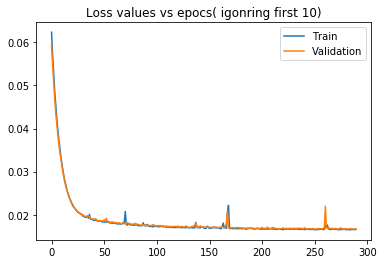

In [58]:
plt.plot(autoencoder.history.history['loss'][10:],label="Train")
plt.plot(autoencoder.history.history['val_loss'][10:],label="Validation")
plt.title("Loss values vs epocs( igonring first 10)")
plt.legend()
plt.show()

In [164]:
def split(model, start, end):
    confs = model.get_config()
    kept_layers = set()
    for i, l in enumerate(confs['layers']):
        if i == 0:
            confs['layers'][0]['config']['batch_input_shape'] = model.layers[start].input_shape
            if i != start:
                confs['layers'][0]['name'] += str(random.randint(0, 100000000)) # rename the input layer to avoid conflicts on merge
                confs['layers'][0]['config']['name'] = confs['layers'][0]['name']
        elif i < start or i > end:
            continue
        kept_layers.add(l['name'])
    # filter layers
    layers = [l for l in confs['layers'] if l['name'] in kept_layers]
    layers[1]['inbound_nodes'][0][0][0] = layers[0]['name']
    # set conf
    confs['layers'] = layers
    confs['input_layers'][0][0] = layers[0]['name']
    confs['output_layers'][0][0] = layers[-1]['name']
    # create new model
    submodel = Model.from_config(confs)
    for l in submodel.layers:
        orig_l = model.get_layer(l.name)
        if orig_l is not None:
            l.set_weights(orig_l.get_weights())
    return submodel
model = split(autoencoder,0,1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 34)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 18)                630       
Total params: 630
Trainable params: 630
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 18)                630       
_________________________________________________________________
dense_162 (Dense)            (None, 91)                1729      
_________________________________________________________________
dense_163 (Dense)            (None, 145)               13340     
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 146       
Total params: 15,845
Trainable params: 15,845
Non-trainable params: 0
_________________________________________________________________
Train on 1260 samples, validate on 420 samples
Epoch 1/1200
1260/1260 [==============================] - 2s 2ms/step - loss: 1.5493 - mean_squared_error: 1.5493 - mean_absolute_error: 0.9889 - coeff_determination: -0.5837 - rmse: 3.9302 - val_loss: 1.5012 - val_mean_squ

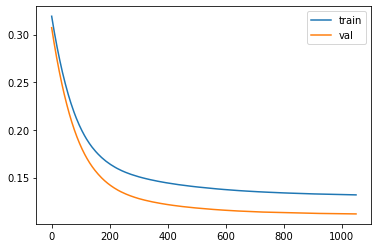

In [177]:
# Set callback functions to early stop training and save the best model so far
callbacks_best = [EarlyStopping(monitor='val_loss', patience=20),
         #ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
            ]
optimizer = SGD(lr=0.0001)
model = Sequential()
model.add(autoencoder.layers[0])
model.add(autoencoder.layers[1])
model.add(Dense(91,activation='relu'))
model.add(Dense(145, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
autoencoder.layers[0].weights
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae',coeff_determination,rmse])
history = model.fit(x_train, y_train_log_std,
                epochs=1200,
                batch_size=60,
                validation_data=(x_val, y_val_log_std),
                callbacks=callbacks_best
                   )

y_pred_val = np.exp(scaler.inverse_transform(model.predict(x_val).reshape(-1, 1)))
y_pred_train = np.exp(scaler.inverse_transform(model.predict(x_train).reshape(-1, 1)))
y_pred_test = np.exp(scaler.inverse_transform(model.predict(x_test).reshape(-1, 1)))

print("RMSE Train", np.sqrt(mean_squared_error(y_pred_train, y_train)))
print("RMSE VAL", np.sqrt(mean_squared_error(y_pred_val, y_val)))
print("RMSE TEST", np.sqrt(mean_squared_error(y_pred_test, y_test)))
plt.plot(history.history['loss'][150:],label="train")
plt.plot(history.history['val_loss'][150:],label="val")
plt.legend()

In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 91)                3185      
_________________________________________________________________
dense_135 (Dense)            (None, 145)               13340     
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 146       
Total params: 16,671
Trainable params: 16,671
Non-trainable params: 0
_________________________________________________________________


Train on 1260 samples, validate on 420 samples
Epoch 1/800
1260/1260 [==============================] - 1s 1ms/step - loss: 1.5014 - mean_squared_error: 1.5014 - mean_absolute_error: 0.9227 - coeff_determination: -0.5108 - rmse: 3.9803 - val_loss: 1.4586 - val_mean_squared_error: 1.4586 - val_mean_absolute_error: 0.9163 - val_coeff_determination: -0.4926 - val_rmse: 3.8746
Epoch 2/800
1260/1260 [==============================] - 0s 71us/step - loss: 1.4442 - mean_squared_error: 1.4442 - mean_absolute_error: 0.9089 - coeff_determination: -0.4503 - rmse: 3.8291 - val_loss: 1.4052 - val_mean_squared_error: 1.4052 - val_mean_absolute_error: 0.9030 - val_coeff_determination: -0.4380 - val_rmse: 3.7357
Epoch 3/800
1260/1260 [==============================] - 0s 62us/step - loss: 1.3923 - mean_squared_error: 1.3923 - mean_absolute_error: 0.8959 - coeff_determination: -0.4040 - rmse: 3.6970 - val_loss: 1.3560 - val_mean_squared_error: 1.3560 - val_mean_absolute_error: 0.8904 - val_coeff_determ

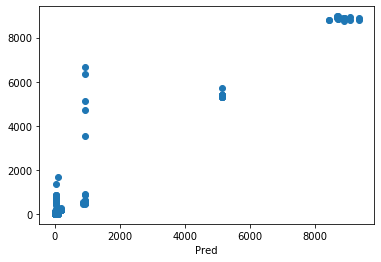

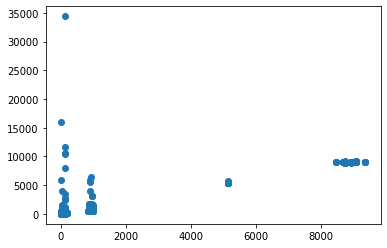

In [112]:
# Set callback functions to early stop training and save the best model so far
callbacks_best = [EarlyStopping(monitor='val_loss', patience=20),
         #ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
            ]
optimizer = SGD(lr=0.0001)
#optimizer = Adagrad(lr=0.005)
#optimizer = RMSprop(0.001) 
#optimizer = 'adam'
model = Sequential()
model.add(Dense(80, input_shape=(34,)))
model.add(Dense(85, activation='relu'))
model.add(Dense(145, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae',coeff_determination,rmse])
history = model.fit(x_train, y_train_log_std,
                epochs=800,
                batch_size=80,
                validation_data=(x_val, y_val_log_std),
                callbacks=callbacks_best
                   )

y_pred_val = np.exp(scaler.inverse_transform(model.predict(x_val).reshape(-1, 1)))
y_pred_train = np.exp(scaler.inverse_transform(model.predict(x_train).reshape(-1, 1)))
y_pred_test = np.exp(scaler.inverse_transform(model.predict(x_test).reshape(-1, 1)))

print("RMSE Train", np.sqrt(mean_squared_error(y_pred_train, y_train)))
print("RMSE VAL", np.sqrt(mean_squared_error(y_pred_val, y_val)))
print("RMSE TEST", np.sqrt(mean_squared_error(y_pred_test, y_test)))

plt.scatter(y_pred_val,y_val)
plt.xlabel("Pred")
plt.show()
plt.scatter(y_pred_train,y_train)
plt.show()


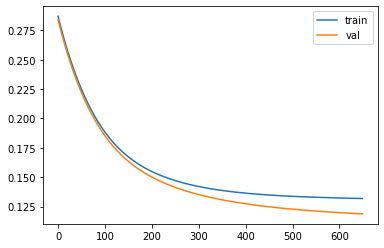

In [115]:
plt.plot(history.history['loss'][150:],label="train")
plt.plot(history.history['val_loss'][150:],label="val")
plt.legend()

RMSE Train 1.0500887165434236
RMSE VAL 1.0071129066903037
RMSE TEST 1.0471842002327723


In [13]:
model.save('modelos/best_model_without_early_stop.h5'.format(best_l1,best_l2))

In [45]:
def coeff_determination_simple(y_true, y_pred):
    SS_res =  np.sum(np.square( y_true - y_pred )) 
    SS_tot = np.sum(np.square( y_true - np.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
print(coeff_determination_simple(y_pred_train,y_train))
print(coeff_determination_simple(y_pred_val,y_val))
print(coeff_determination_simple(y_pred_test,y_test))

0.6600985653773364
0.9415134266340286
0.9857207026672177


In [30]:
for i in range(y_val.shape[0]):
    print("%10.3f,  %10.3f"%(y_pred_val[i,0],y_val[i,0]))
for i in range(y_pred_train.shape[0]):
    print("%10.3f,  %10.3f"%(y_pred_train[i,0],y_train[i,0]))

   178.448,     165.000
   116.511,      23.000
  9324.725,    8815.800
     3.005,      35.200
     1.095,       1.000
     1.461,       2.200
  5672.001,    5324.400
    39.887,     827.000
  1362.279,     471.400
   193.674,     170.400
    20.091,      19.000
  1388.128,    3546.600
    30.373,      24.000
     3.005,       3.000
     9.675,       4.000
     5.565,      35.400
   193.585,     171.400
   193.445,     171.600
  5672.001,    5388.000
  1858.879,     471.200
     3.005,       2.000
     9.675,       1.000
    39.887,     839.200
  1787.082,     490.800
     0.679,       1.000
    20.091,      19.000
     9.675,       3.400
    70.121,      69.800
  5672.001,    5409.600
  9454.349,    8868.200
  9324.716,    8955.800
    21.515,      19.200
  1787.082,     478.600
   200.741,     175.000
    39.887,      24.800
  5672.001,    5342.000
   193.445,     176.000
    68.905,      83.800
     1.039,       1.000
    21.515,      19.200
    20.878,      19.200
     1.039,     

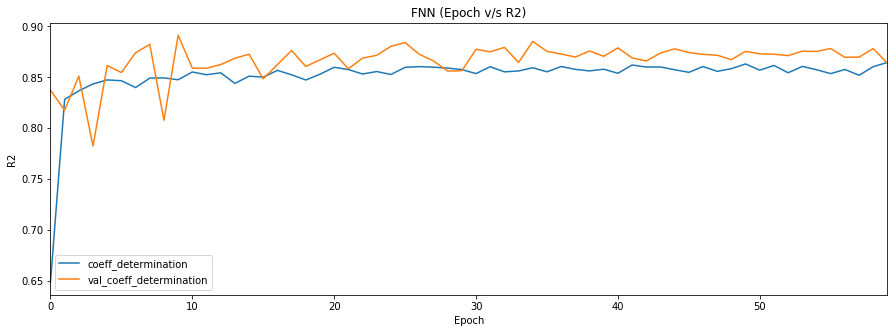

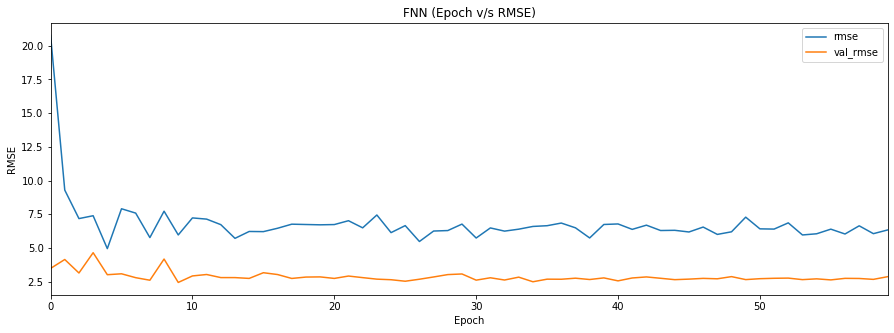

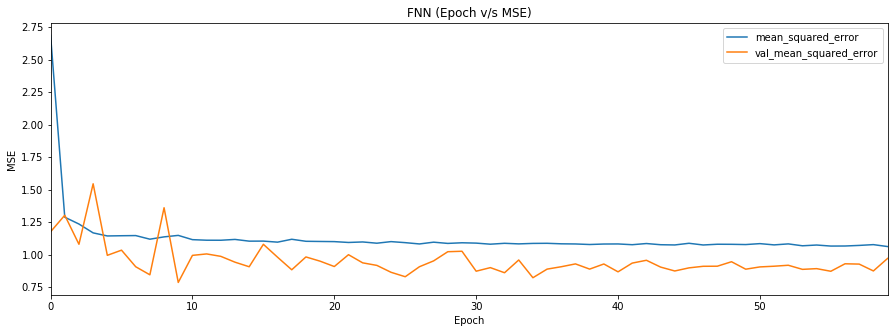

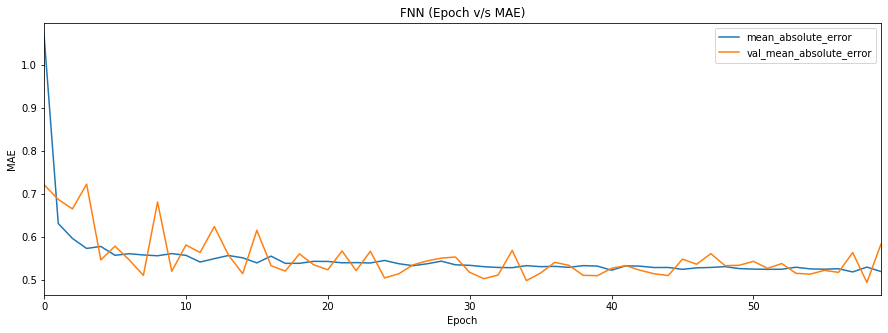

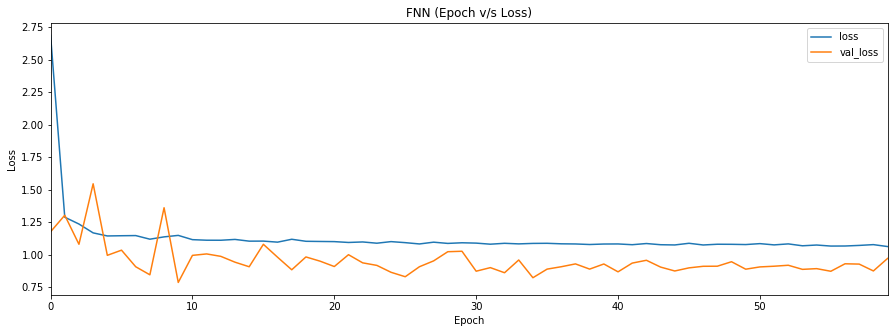

In [31]:
def plot_history(history, title=''):
    plot_r2 = {'coeff_determination': history.history['coeff_determination'], 'val_coeff_determination': history.history['val_coeff_determination']}
    plot_rmse = {'rmse': history.history['rmse'], 'val_rmse': history.history['val_rmse']}
    plot_mse = {'mean_squared_error': history.history['mean_squared_error'], 'val_mean_squared_error': history.history['val_mean_squared_error']}
    plot_mae = {'mean_absolute_error': history.history['mean_absolute_error'], 'val_mean_absolute_error': history.history['val_mean_absolute_error']}
    plot_loss = {'loss': history.history['loss'], 'val_loss': history.history['val_loss']}

    _ = pd.DataFrame(plot_r2).plot(figsize=(15, 5), title='{0} (Epoch v/s R2)'.format(title))
    _.set_xlabel("Epoch")
    _.set_ylabel("R2")
   
    _ = pd.DataFrame(plot_rmse).plot(figsize=(15, 5), title='{0} (Epoch v/s RMSE)'.format(title))
    _.set_xlabel("Epoch")
    _.set_ylabel("RMSE")
    
    _ = pd.DataFrame(plot_mse).plot(figsize=(15, 5), title='{0} (Epoch v/s MSE)'.format(title))
    _.set_xlabel("Epoch")
    _.set_ylabel("MSE")
    
    _ = pd.DataFrame(plot_mae).plot(figsize=(15, 5), title='{0} (Epoch v/s MAE)'.format(title))
    _.set_xlabel("Epoch")
    _.set_ylabel("MAE")

    _ = pd.DataFrame(plot_loss).plot(figsize=(15, 5), title='{0} (Epoch v/s Loss)'.format(title))
    _.set_xlabel("Epoch")
    _.set_ylabel("Loss")
#     
plot_history(history, title='FNN')

<div style="background-color:rgb(174, 229, 202);">

**Se probará con datos en escala lineal, escalando los targets entre 0 y 1 para los Sigmoide de salida**

In [51]:
from sklearn.preprocessing import MinMaxScaler

#scale targets
mms = MinMaxScaler()
mms.fit(y_train)
y_train_norm = mms.transform(y_train)
y_val_norm = mms.transform(y_val)
y_test_norm = mms.transform(y_test)


# Set callback functions to early stop training and save the best model so far
callbacks_best = [EarlyStopping(monitor='val_loss', patience=50),
         #ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
            ]
#optimizer = SGD(lr=0.001)
#optimizer = RMSprop(0.001) 
optimizer = 'adam'
model = Sequential()
model.add(Dense(400, activation='relu',kernel_initializer='he_uniform', input_shape=(34,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(400, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#model.add(Dense(200, activation='sigmoid'))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae',coeff_determination,rmse])
history = model.fit(x_train, y_train_norm, epochs=200, validation_data=(x_val, y_val_norm),
             callbacks=callbacks_best
                   )
model.save('modelos/best_model_with_early_stop.h5'.format(best_l1,best_l2))



Train on 1260 samples, validate on 420 samples
Epoch 1/200
1260/1260 [==============================] - 6s 5ms/step - loss: 0.2483 - mean_squared_error: 0.2483 - mean_absolute_error: 0.3871 - coeff_determination: -130.3951 - rmse: 1.5502 - val_loss: 0.1174 - val_mean_squared_error: 0.1174 - val_mean_absolute_error: 0.2117 - val_coeff_determination: -36.1442 - val_rmse: 1.2901
Epoch 2/200
1260/1260 [==============================] - 1s 850us/step - loss: 0.1508 - mean_squared_error: 0.1508 - mean_absolute_error: 0.2789 - coeff_determination: -62.1765 - rmse: 1.3755 - val_loss: 0.0532 - val_mean_squared_error: 0.0532 - val_mean_absolute_error: 0.1735 - val_coeff_determination: -15.9874 - val_rmse: 1.2052
Epoch 3/200
1260/1260 [==============================] - 1s 769us/step - loss: 0.0747 - mean_squared_error: 0.0747 - mean_absolute_error: 0.1854 - coeff_determination: -51.8116 - rmse: 1.2309 - val_loss: 0.0170 - val_mean_squared_error: 0.0170 - val_mean_absolute_error: 0.1146 - val_coef

0.00030636787 0.23332718 0.0 0.260762629081775
0.00030636787 0.23332718 0.0 1.0
10.738075 8025.908 0.2 8969.6
RMSE Train 1261.500971119792 R2 0.7431550602086896
RMSE VAL 560.1049195781934 R2 0.9352291983797915
RMSE TEST 341.6038119179122 R2 0.9749757308516355


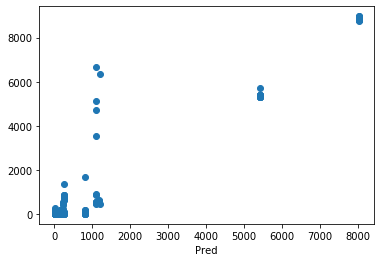

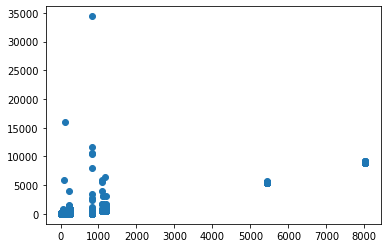

In [53]:
#Predicciones
y_pred_val_norm = model.predict(x_val)
y_pred_train_norm =model.predict(x_train)
y_pred_train_inversed = mms.inverse_transform(y_pred_train_norm.reshape(-1, 1))

print(np.min(y_pred_val_norm),np.max(y_pred_val_norm),np.min(y_val_norm),np.max(y_val_norm))
print(np.min(y_pred_train_norm),np.max(y_pred_train_norm),np.min(y_train_norm),np.max(y_train_norm))

y_pred_val_inversed = mms.inverse_transform(y_pred_val_norm.reshape(-1, 1))
print(np.min(y_pred_val_inversed),np.max(y_pred_val_inversed),np.min(y_val),np.max(y_val))


y_pred_test_norm =model.predict(x_test)
y_pred_test_inversed = mms.inverse_transform(y_pred_test_norm.reshape(-1, 1))

print("RMSE Train",np.sqrt(
    mean_squared_error(
        y_pred_train_inversed,
        y_train)),
      "R2",coeff_determination_simple(y_train,
                                      y_pred_train_inversed))
print("RMSE VAL",np.sqrt(mean_squared_error(y_pred_val_inversed,y_val)),"R2",coeff_determination_simple(y_val,
                                      y_pred_val_inversed))
print("RMSE TEST",np.sqrt(mean_squared_error(y_pred_test_inversed,y_test)),"R2",coeff_determination_simple(y_test,
                                      y_pred_test_inversed))

plt.scatter(y_pred_val_inversed,y_val)
plt.xlabel("Pred")
plt.show()
plt.scatter(y_pred_train_inversed, y_train)
plt.show()

In [41]:
plot_history(history, title='FNN')

KeyError: 'mean_squared_error'

In [40]:
for i in range(y_val.shape[0]):
    print("%10.3f,  %10.3f"%(y_pred_val_inversed[i,0],y_val[i,0]))
for i in range(y_pred_train_inversed.shape[0]):
    print("%10.3f,  %10.3f"%(y_pred_train_inversed[i,0],y_train[i,0]))

   166.572,     179.600
  1350.625,      53.400
    56.209,       0.200
   119.110,       1.000
    93.444,       2.000
   173.004,      80.800
   173.489,      34.600
   129.793,      19.000
   180.124,      50.600
   264.786,      24.800
   105.893,      19.200
  7743.977,    8807.400
   264.786,      14.000
   110.180,      19.200
  1350.625,       6.000
  7742.298,    8815.800
   168.177,       1.000
    56.104,       1.000
  7716.535,    8878.600
   175.323,      85.000
   264.786,     870.600
    56.209,       1.000
    56.104,       1.000
   229.844,      29.400
    78.853,       1.000
    91.536,      25.600
   166.572,     173.400
   166.572,     176.200
    78.853,       1.000
  4846.250,    5325.400
   229.844,      22.800
    62.791,       1.000
   220.892,     170.000
  7743.977,    8868.200
    78.853,       1.000
   166.572,     175.000
   119.110,       1.000
   229.844,     109.400
   107.076,      21.000
  1350.625,     196.000
  1059.565,     590.400
   229.844,     

<div style="background-color:rgb(174, 229, 202);">

**SVR del paper original**

In [19]:
Cs, epsilons = pd.np.meshgrid([i for i in range(1,1000,50)],np.arange(0.05,0.3,0.05))
scores_train = []
scores_val = []
mse_svr = []
mse_svr_val = []
best_epsilon = 0.05
best_c = 1
best_mse_val_svr = -1 
scaler_yz = StandardScaler()
scaler_yz = scaler_yz.fit(y_train)
y_train_scaled_svr = scaler_yz.transform(y_train)
y_val_scaled_svr = scaler_yz.transform(y_val)

for C, epsilon in zip(Cs.reshape((-1,1)), epsilons.reshape((-1,1))):
    sv = SVR(C=C, epsilon=epsilon)
 
    sv.fit(x_train, np.ravel(y_train_scaled_svr))
    
    y_train_hat_svr = scaler_yz.inverse_transform(sv.predict(x_train).reshape(-1, 1))
    y_val_hat_svr = scaler_yz.inverse_transform(sv.predict(x_val).reshape(-1, 1))

    #MSE for valid
    mse_svr_curr = mean_squared_error(y_train_hat_svr,y_train)
    mse_svr.append(mse_svr_curr)
    
    mse_svr_val_curr = mean_squared_error(y_val_hat_svr,y_val)
    mse_svr_val.append(mse_svr_val_curr)

    scores_train_curr = sv.score(x_train, y_train_scaled_svr)
    scores_train.append(scores_train_curr)
    scores_val_curr = sv.score(x_val,   y_val_scaled_svr)
    scores_val.append(scores_val_curr)
    if mse_svr_val_curr < best_mse_val_svr or best_mse_val_svr == -1:
        best_mse_val_svr = mse_svr_val_curr
        best_epsilon = epsilon
        best_c = C

    print(C, epsilon, np.sqrt(mse_svr_curr), np.sqrt(mse_svr_val_curr), scores_train_curr, scores_val_curr)
    print("c: {}, Epsilon: {}, support vectors:{}".format(C, epsilon,len(sv.support_)))


NameError: name 'StandardScaler' is not defined

In [68]:
from sklearn.svm import NuSVR
from sklearn.preprocessing import StandardScaler
from time import time
sv = NuSVR(C=300, nu=0.3)

scaler_yz = StandardScaler()
scaler_yz = scaler_yz.fit(y_train)
y_train_scaled_svr = scaler_yz.transform(y_train)
y_val_scaled_svr = scaler_yz.transform(y_val)
y_test_scaled_svr = scaler_yz.transform(y_test)

t0=time()
print("before train: Init time: {}".format(round(t0,3)))

sv.fit(x_train, np.ravel(y_train_scaled_svr))
t1=time()
print("after train, finish time: {}".format(round(t1,3)))
print("training time {}",format(round(t1-t0,3)))
y_train_hat_svr = scaler_yz.inverse_transform(sv.predict(x_train).reshape(-1, 1))
y_val_hat_svr = scaler_yz.inverse_transform(sv.predict(x_val).reshape(-1, 1))
y_test_hat_svr = scaler_yz.inverse_transform(sv.predict(x_test).reshape(-1, 1))

#MSE for valid
mse_svr_curr = np.sqrt(mean_squared_error(y_train_hat_svr,y_train))
mse_svr_val_curr = np.sqrt(mean_squared_error(y_val_hat_svr,y_val))
mse_svr_test_curr = np.sqrt(mean_squared_error(y_test_hat_svr,y_test))

scores_train_curr = sv.score(x_train, y_train_scaled_svr)
scores_val_curr = sv.score(x_val,   y_val_scaled_svr)
scores_test_curr = sv.score(x_test,   y_test_scaled_svr)

print("MSE val: {}, MSE train {}, R2 val:{}, R2 train:{}".format(mse_svr_val_curr,mse_svr_curr,scores_val_curr,scores_train_curr))
print("MSE test: {}, R2 test:{}".format(mse_svr_test_curr, scores_test_curr))

before train: Init time: 1567015898.577


/home/daniel/.conda/envs/rhassan/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


after train, finish time: 1567016038.713
training time {} 140.136
MSE val: 534.5756006961892, MSE train 1279.9309183816529, R2 val:0.9409990828252677, R2 train:0.7355954674016274
MSE test: 263.2776831485221, R2 test:0.9851357130416789


In [21]:
#y_pred_val = np.exp(model.predict(x_val))
y_val_hat_svr = scaler_yz.inverse_transform(sv.predict(x_val).reshape(-1, 1))

for i in range(y_val.shape[0]):
    print("%10.3f %10.3f"%(y_val_hat_svr[i,0],y_val[i,0]))


   189.747    179.600
    49.059     53.400
    15.888      0.200
    16.026      1.000
    17.525      2.000
    40.302     80.800
    48.690     34.600
    34.605     19.000
    62.252     50.600
    44.000     24.800
    28.453     19.200
  9000.349   8807.400
    44.000     14.000
    31.288     19.200
    49.059      6.000
  9009.268   8815.800
    16.663      1.000
   -13.019      1.000
  8983.049   8878.600
    53.375     85.000
    44.000    870.600
    15.888      1.000
   -13.019      1.000
    43.624     29.400
    16.754      1.000
    30.395     25.600
   189.747    173.400
   189.747    176.200
    16.754      1.000
  5424.749   5325.400
    43.624     22.800
     9.428      1.000
   177.970    170.000
  9000.349   8868.200
    16.754      1.000
   189.747    175.000
    16.026      1.000
    43.624    109.400
     9.757     21.000
    49.059    196.000
  1003.712    590.400
    43.624      4.000
    16.754      1.000
    16.663      1.000
    43.624    237.200
   177.970

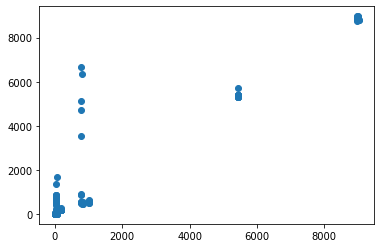

In [22]:
plt.scatter(y_val_hat_svr,y_val)
#plt.scatter(y_pred_val,y_val)

In [23]:
for i in range(y_test.shape[0]):
    print("%10.3f %10.3f"%(y_test_hat_svr[i,0],y_test[i,0]))

    15.888      1.000
    14.109      1.000
  5424.749   5432.800
    16.663    421.800
    44.000    840.400
   811.867   2463.000
    16.026      1.000
    16.663      7.000
    16.754      1.000
    14.109      3.000
    43.624     14.200
   190.115    175.000
    15.888      1.000
    30.395     12.000
   782.158   2449.800
    31.288     19.200
    34.605     19.000
    16.754      1.000
    21.784     12.000
    16.754      1.000
    16.237      1.000
    14.109      2.000
    16.663    218.600
     9.428      1.000
    21.784      1.000
    15.888      5.000
    30.395     33.000
   190.900    176.200
    16.754      1.000
     8.620     19.000
  8991.413   9345.200
    43.624     25.600
    15.215      2.000
   190.900    175.400
    16.663      3.000
    14.109      3.000
    16.754      1.000
    16.237      1.000
    34.605     19.000
    34.605     19.000
    17.525     70.000
    34.311     19.200
    43.624      7.000
    17.525     35.800
    17.525      3.000
    16.754

In [24]:
baseline = np.var(y_val)
mse= mean_squared_error(y_pred_val,y_val)
r2 = 1 - (mse/baseline)
r2

-0.13620373428859867

<div style="background-color:rgb(174, 229, 202);">

**SVR  con targets logarítmicos**

In [67]:
from sklearn.svm import NuSVR
from sklearn.preprocessing import StandardScaler
from time import time
sv_log = NuSVR(C=300, nu=0.3)

scaler_yz_log = StandardScaler()
scaler_yz_log = scaler_yz_log.fit(y_train_log)

y_train_scaled_svr_log = scaler_yz_log.transform(y_train_log)
y_val_scaled_svr_log = scaler_yz_log.transform(y_val_log)
y_test_scaled_svr_log = scaler_yz_log.transform(y_test_log)

t0=time()
print("before train: Init time: {}".format(round(t0,3)))

sv_log.fit(x_train, np.ravel(y_train_scaled_svr_log))
t1=time()
print("after train, finish time: {}".format(round(t1,3)))
print("training time {}",format(round(t1-t0,3)))
y_train_hat_svr_log = scaler_yz_log.inverse_transform(sv_log.predict(x_train).reshape(-1, 1))
y_val_hat_svr_log = scaler_yz_log.inverse_transform(sv_log.predict(x_val).reshape(-1, 1))
y_test_hat_svr_log = scaler_yz_log.inverse_transform(sv_log.predict(x_test).reshape(-1, 1))

#MSE for valid
mse_svr_curr_log = np.sqrt(mean_squared_error(np.exp(y_train_hat_svr_log),y_train))
mse_svr_val_curr_log = np.sqrt(mean_squared_error(np.exp(y_val_hat_svr_log),y_val))
mse_svr_test_curr_log = np.sqrt(mean_squared_error(np.exp(y_test_hat_svr_log),y_test))

scores_train_curr_log = sv_log.score(x_train, y_train_scaled_svr_log)
scores_val_curr_log = sv_log.score(x_val,   y_val_scaled_svr_log)
scores_test_curr_log = sv_log.score(x_test,   y_test_scaled_svr_log)

print("MSE val: {}, MSE train {}, R2 val:{}, R2 train:{}".format(mse_svr_val_curr_log,mse_svr_curr_log,scores_val_curr_log,scores_train_curr_log))
print("MSE test: {}, R2 test:{}".format(mse_svr_test_curr_log, scores_test_curr_log))

before train: Init time: 1567015699.161


/home/daniel/.conda/envs/rhassan/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


after train, finish time: 1567015708.422
training time {} 9.261
MSE val: 842.4352279780106, MSE train 1437.6831084960165, R2 val:0.8841592164182628, R2 train:0.8595052728151176
MSE test: 698.5753271923564, R2 test:0.8689339840619775


In [65]:
for i in range(y_test.shape[0]):
    print("%10.3f %10.3f"%(np.exp(y_test_hat_svr_log[i,0]),y_test[i,0]))

     1.498      1.000
     2.807      1.000
  3824.698   5432.800
     5.994    421.800
    41.064    840.400
   769.493   2463.000
     1.498      1.000
     5.994      7.000
     1.497      1.000
     2.807      3.000
    39.767     14.200
   161.669    175.000
     1.498      1.000
    21.556     12.000
   819.621   2449.800
    26.391     19.200
    28.737     19.000
     1.497      1.000
    18.702     12.000
     1.497      1.000
     1.499      1.000
     2.807      2.000
     5.994    218.600
     1.341      1.000
    18.702      1.000
     1.498      5.000
    21.556     33.000
   161.975    176.200
     1.497      1.000
    25.571     19.000
  6457.336   9345.200
    39.767     25.600
     0.667      2.000
   161.975    175.400
     5.994      3.000
     2.807      3.000
     1.497      1.000
     1.499      1.000
    28.737     19.000
    28.737     19.000
     2.994     70.000
    26.462     19.200
    39.767      7.000
     2.994     35.800
     2.994      3.000
     1.497

<div style="background-color:rgb(174, 229, 202);">

**SVR  con targets logarítmicos**

Los r2_score obtenidos son peores que los que entrega la SVR con los targets sin escala logarítmica.

- MSE train 1437.68
- MSE val: 842.43
- MSE test: 698.57
- R2 train:0.86
- R2 val:0.88
- R2 test:0.87